In [24]:
import pandas as pd

data = pd.read_csv('data/인구현황.csv')
data.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


4-1 지역별 총 인구수 top5

In [23]:
data.loc[data['행정기관'] != '전국', ['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


In [77]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop) # Malgun Gothic
matplotlib.rc('font',family=font_prop)



Malgun Gothic


C:\Users\user\AppData\Local\Temp\ipykernel_7880\3838763262.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)


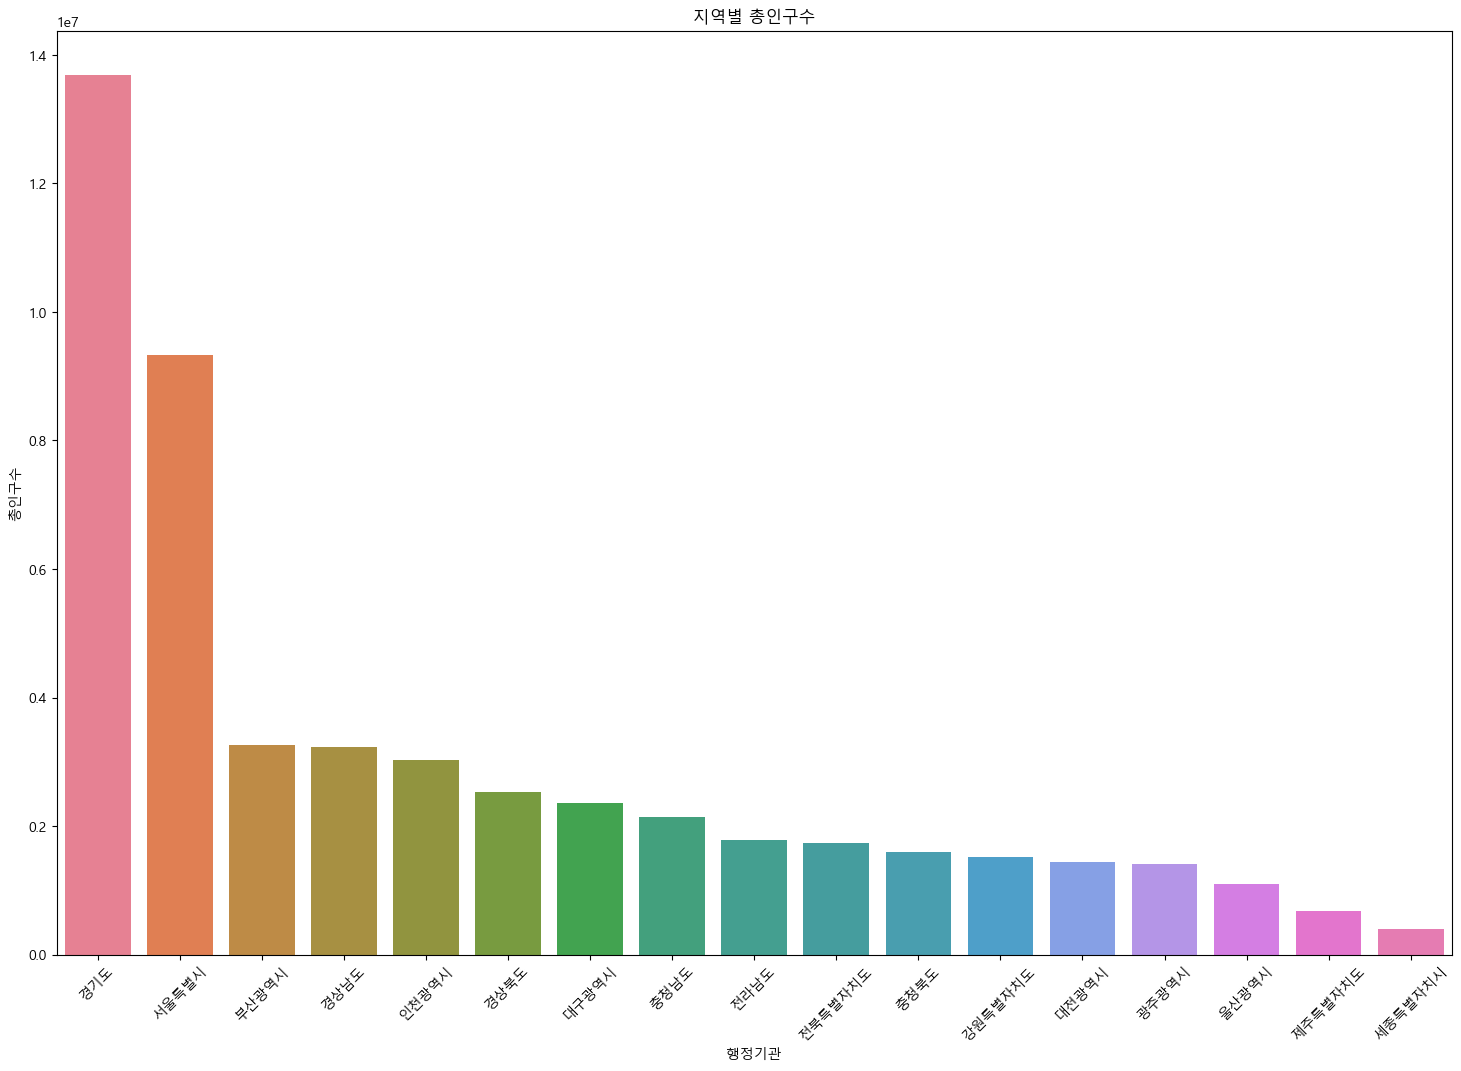

In [47]:

data1 = data.loc[data['행정기관'] != '전국']


def make_plot(ylabel):
    figure, axes1 = plt.subplots(1,1)
    figure.set_size_inches(18,12)
    pop_plot = sns.barplot(data=data1.sort_values(by=ylabel,ascending=False), x='행정기관',y=ylabel, ax=axes1, hue='행정기관')
    pop_plot.set_title(f'지역별 {ylabel}')
    pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)

    if ylabel == '남여 비율':
        plt.axhline(y=1.0,color = 'red',linestyle='--', linewidth=1, label = '남여 비율 1:1')
        plt.legend()
    plt.show()

make_plot('총인구수')

2. 세대당 인구수 높은 지역 Top5

In [32]:
data1[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).head().reset_index(drop=True)


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


C:\Users\user\AppData\Local\Temp\ipykernel_7880\797862906.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)


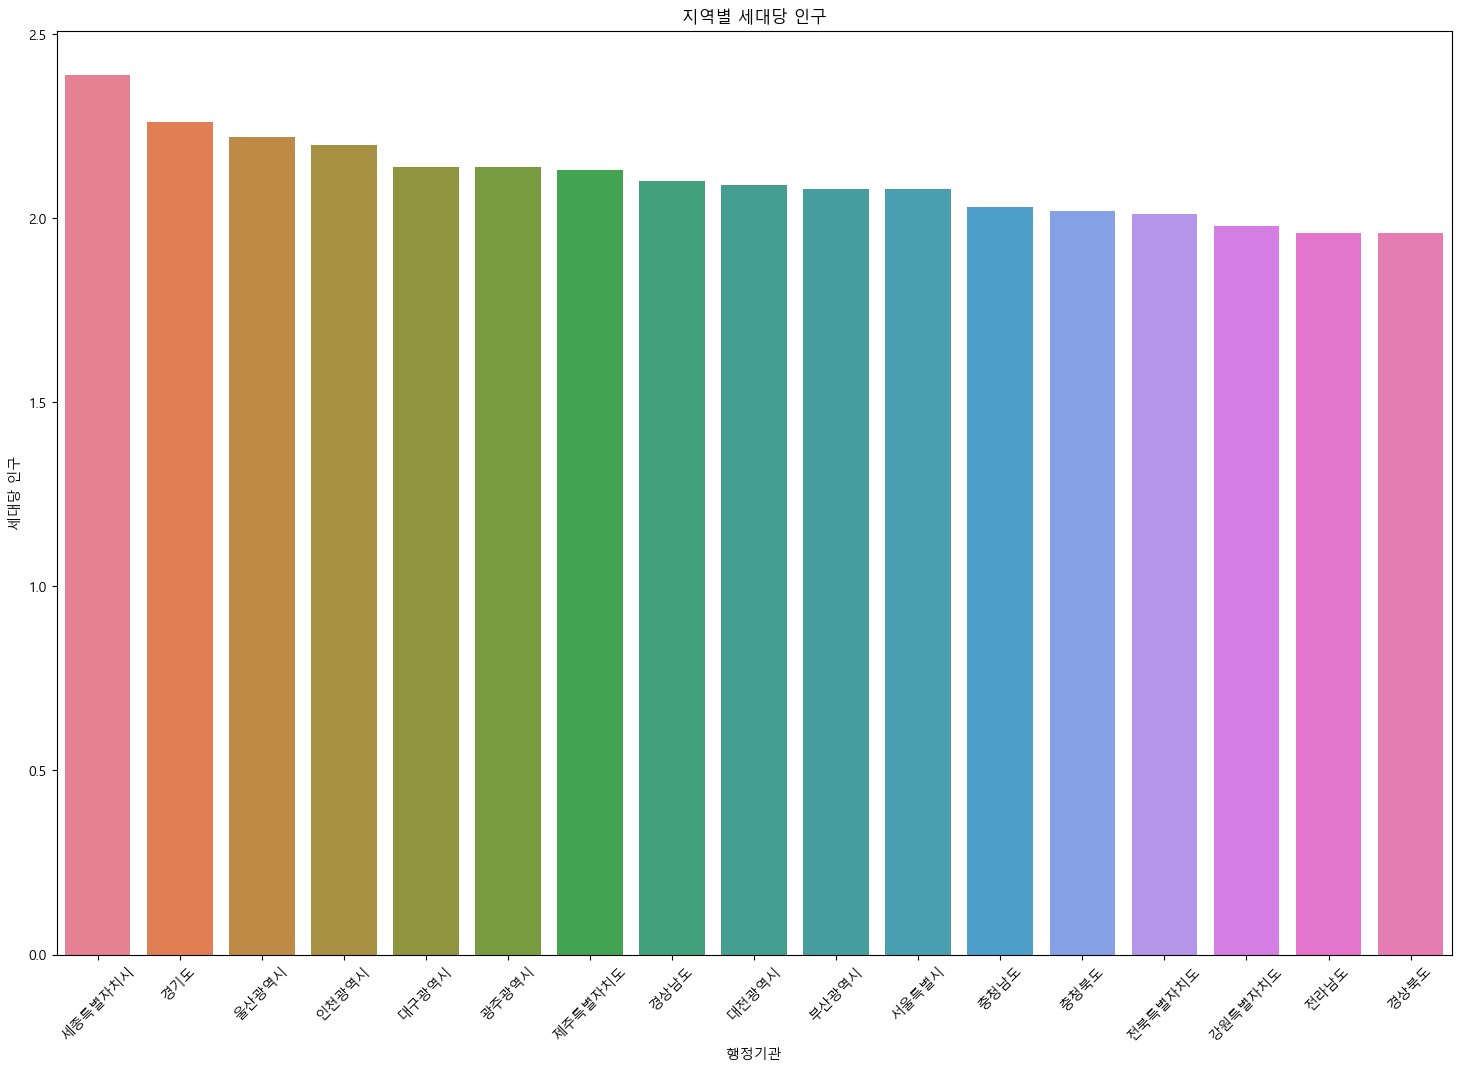

In [36]:
make_plot('세대당 인구')

3. 남녀비율 분석

In [49]:
data1[['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False).reset_index(drop=True)


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


C:\Users\user\AppData\Local\Temp\ipykernel_7880\3838763262.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)


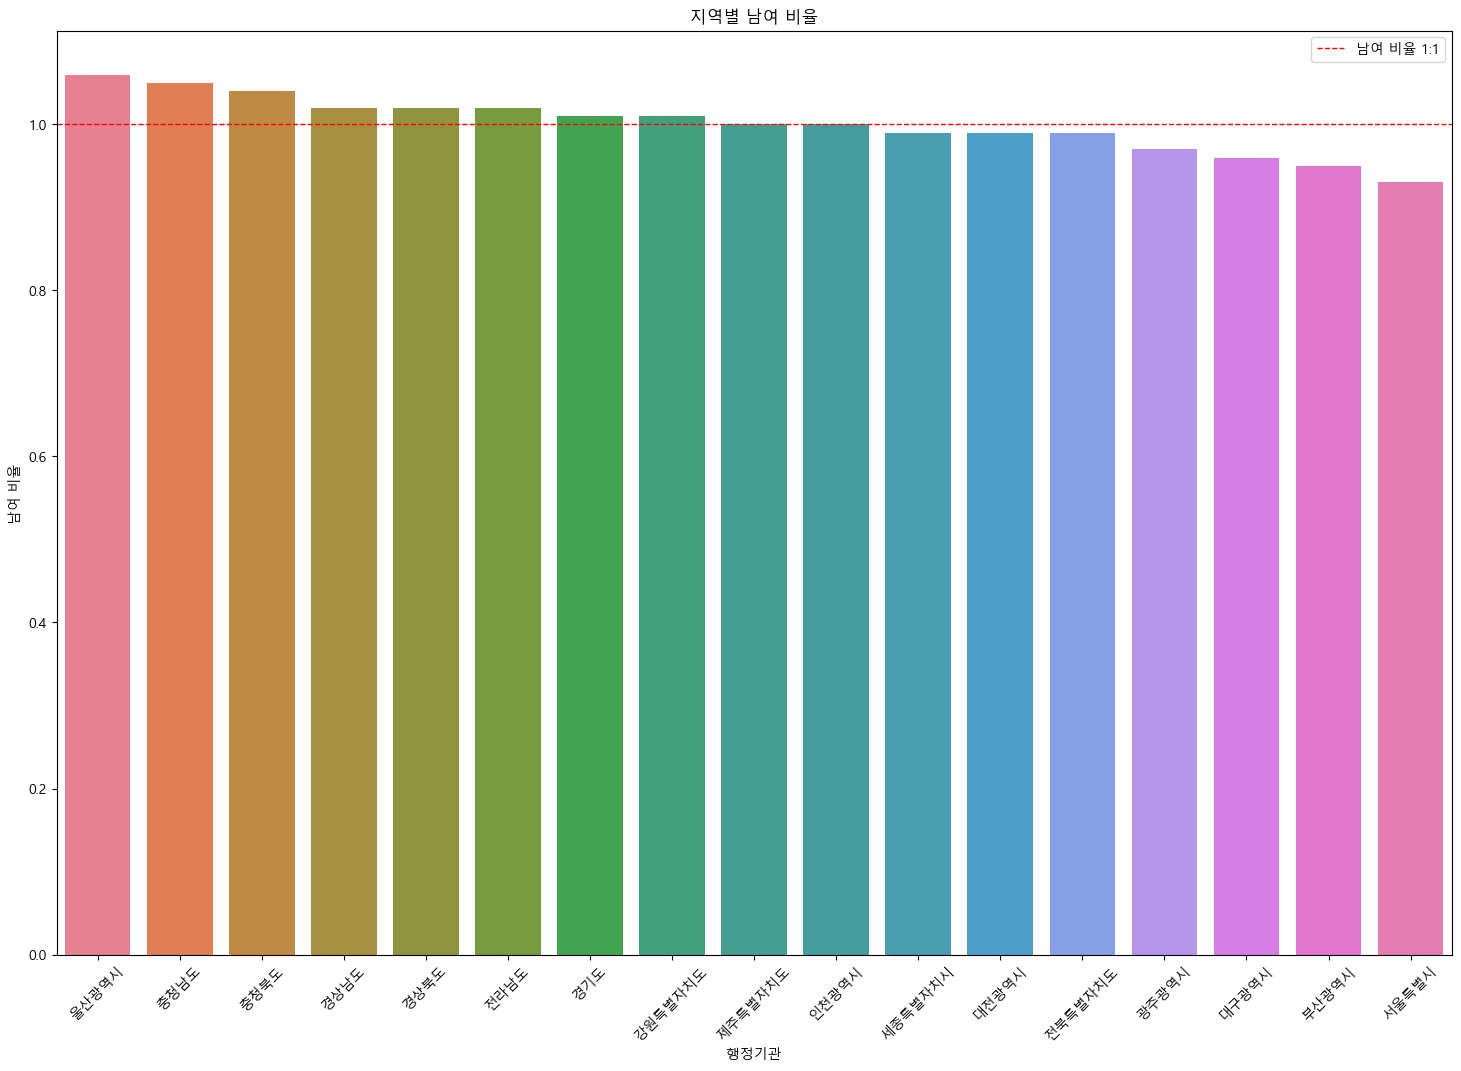

In [48]:
make_plot('남여 비율')

남초/여초 분석석

In [53]:
data2 = data1[['행정기관', '남여 비율']]
def decide(val):
    if val > 1:
        return '남초'
    elif val < 1:
        return '여초'
    else:
        return '동일'
data2['남초여초'] = data2['남여 비율'].map(decide)
data2

C:\Users\user\AppData\Local\Temp\ipykernel_7880\1329978266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['남초여초'] = data2['남여 비율'].map(decide)


,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


세대당 인구 평균보다 높은 지역역

In [62]:
print(f"전국 평균 세대당 인구 {data1['세대당 인구'].mean()}")
data1.loc[data1['세대당 인구'] > data1['세대당 인구'].mean(), ['행정기관','세대당 인구']].sort_values(by='세대당 인구',ascending=False).reset_index(drop=True)

전국 평균 세대당 인구 2.105294117647059


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


C:\Users\user\AppData\Local\Temp\ipykernel_7880\3320163317.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)


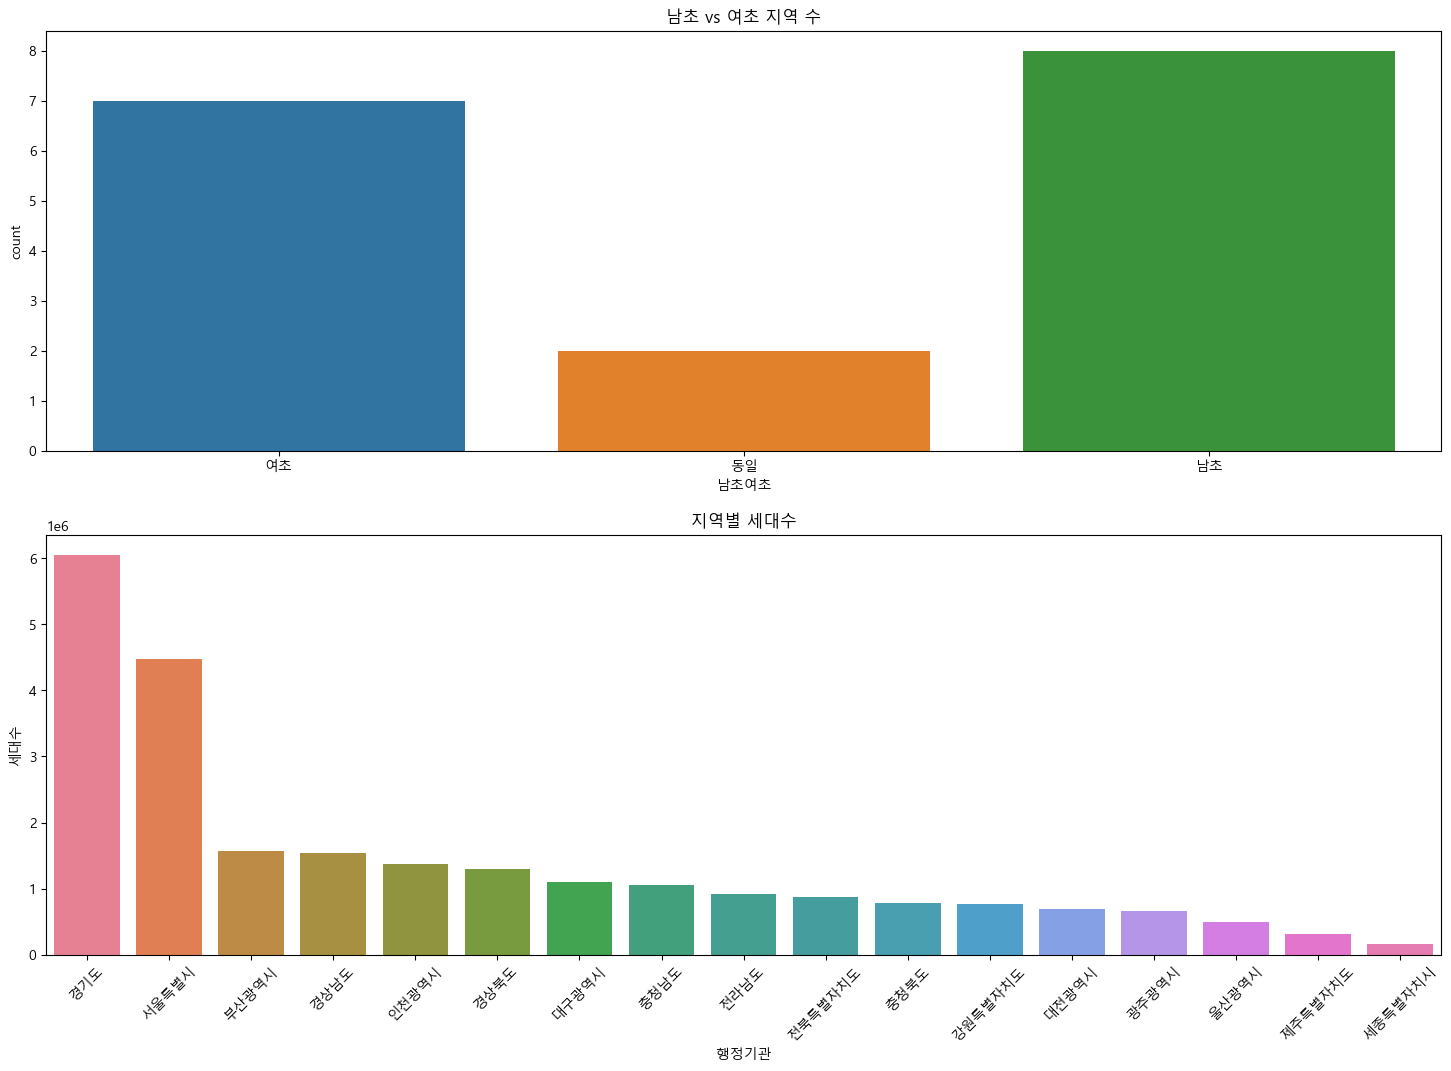

In [69]:
figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 12)
s_plot = sns.countplot(data=data2, x='남초여초', ax=axes1, hue='남초여초')
s_plot.set_title('남초 vs 여초 지역 수')

pop_plot = sns.barplot(data=data1.sort_values(by='세대수', ascending=False), x='행정기관', y='세대수', ax=axes2, hue='행정기관')
pop_plot.set_title('지역별 세대수')
pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)
plt.show()

비교 plot AI의 도움을 받음!!

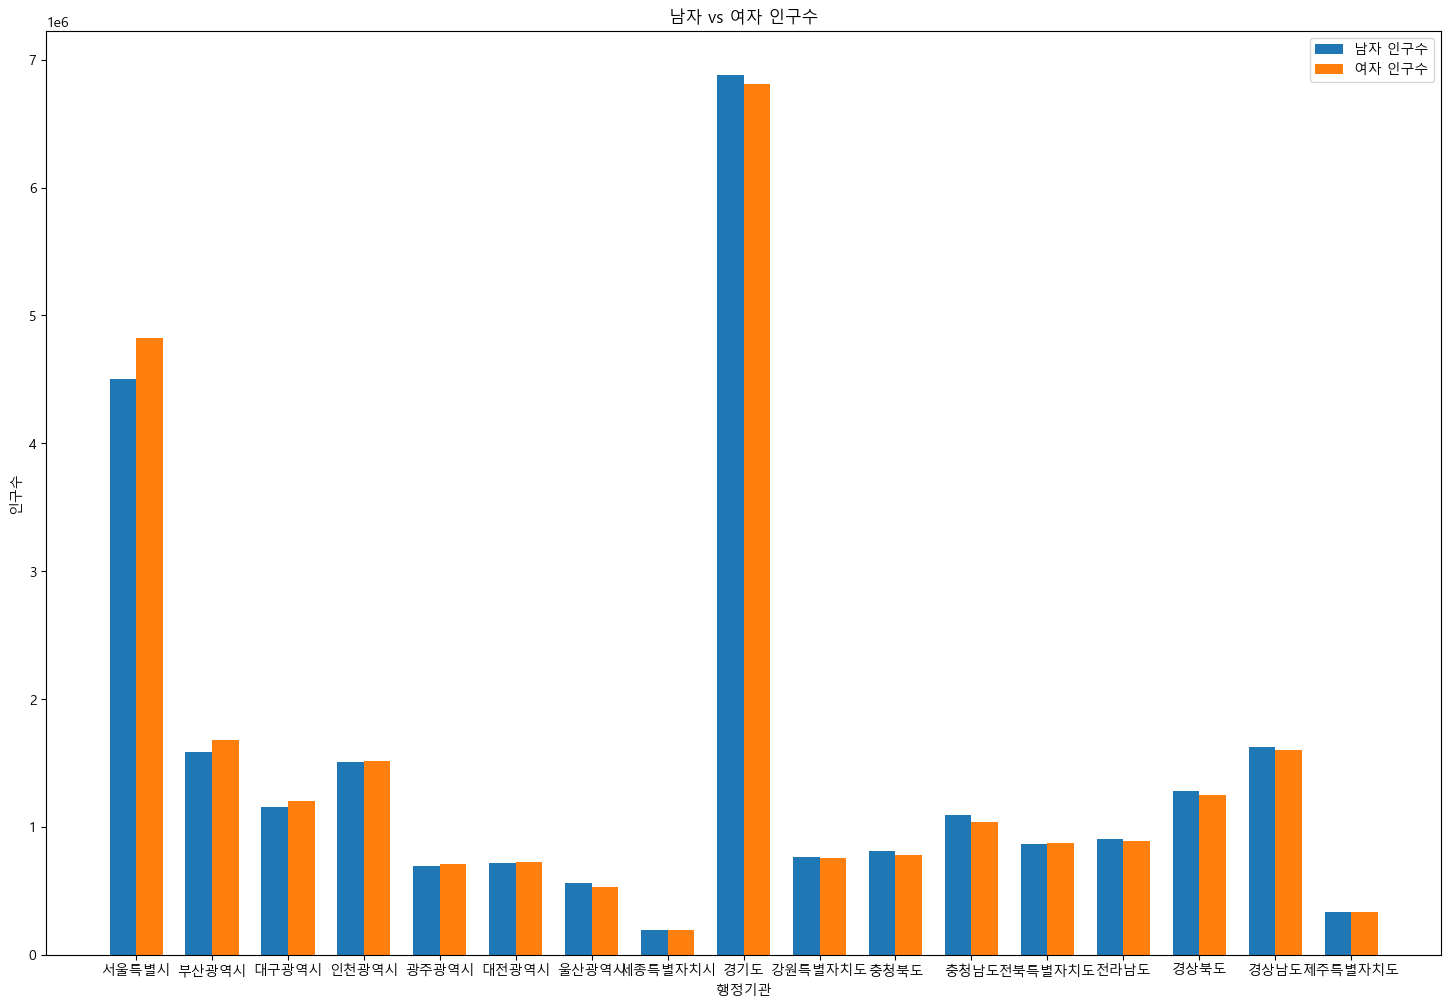

In [84]:

data3 = data1[['행정기관','남자 인구수','여자 인구수']]
x = np.arange(len(data3['행정기관']))  # x축 위치
width = 0.35  # 막대 너비


fig, ax = plt.subplots()
fig.set_size_inches(18,12)
bar1 = ax.bar(x - width/2, data3['남자 인구수'], width, label='남자 인구수')
bar2 = ax.bar(x + width/2, data3['여자 인구수'], width, label='여자 인구수')

# # 그래프 설정
ax.set_xlabel('행정기관')
ax.set_ylabel('인구수')
ax.set_title('남자 vs 여자 인구수')
ax.set_xticks(x)
ax.set_xticklabels(data3['행정기관'])
ax.legend()

plt.show()